# Classification of EN and AE

## Libraries

In [ ]:
import numpy as np
import pandas as pd
import time

#  for ploting
import matplotlib.pyplot as plt
import seaborn as sns

#importing the required ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Loading data and preprocessing

In [ ]:
# Load oni.csv file
from google.colab import files
uploaded = files.upload()

Saving oni.csv to oni.csv


In [ ]:
fname = 'oni.csv'

df = pd.read_csv(fname)

df

,1950-present
0,-0.5
1,-0.4
2,-0.4
3,-0.4
4,-0.6
...,...
854,-0.7
855,-0.8
856,-1.0
857,-1.0


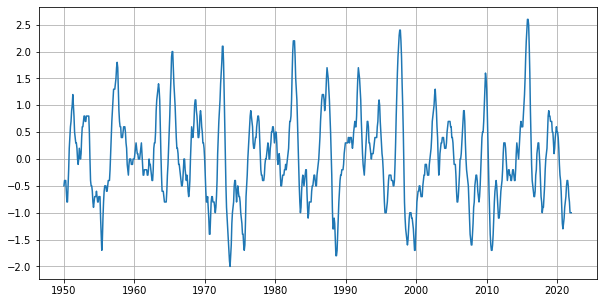

In [ ]:
x = np.linspace(1950,2022,len(df))
plt.figure(figsize=(10,5))
plt.plot(x,df,);
plt.yticks(np.arange(-2, 3, 0.5))
plt.grid();
plt.show();

In [ ]:
# df=df[df.values<2]
X = df.values.reshape(-1,1)
# X

In [ ]:
def target_data_func(X):
  y = []
  for x in X:
    # EN
    if x>=0.5:
      y.append(1)
    # AE
    else : y.append(0)
  
  Y = np.array(y)
  return Y

In [ ]:
Y = target_data_func(X)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
unique, counts = np.unique(Y, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  0 617]
 [  1 242]]


#### Creating train and test sets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 25)

The variable random_state is used to set the seed for the Random number generation (so the experience is reproducible).

In [ ]:
print('Shape of X_train: ',X_train.shape)
print('Shape of X_test : ',X_test.shape)
print('Shape of Y_train: ',Y_train.shape)
print('Shape of Y_test : ',Y_test.shape)

Shape of X_train:  (515, 1)
Shape of X_test :  (344, 1)
Shape of Y_train:  (515,)
Shape of Y_test :  (344,)


In [ ]:
unique, counts = np.unique(Y_train, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  0 374]
 [  1 141]]


In [ ]:
unique, counts = np.unique(Y_test, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  0 243]
 [  1 101]]


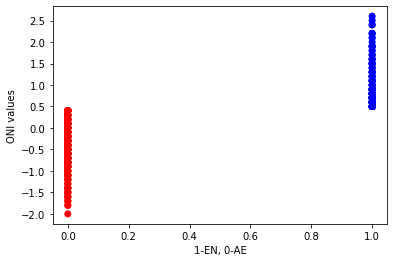

In [ ]:
colors = np.empty(Y_train.shape,dtype=str)
colors[Y_train==0] = 'red' 
colors[Y_train==1] = 'blue'
plt.figure()
plt.ylabel('ONI values')
plt.xlabel('1-EN, 0-AE')
plt.scatter(Y_train,X_train, c=colors);
plt.yticks(np.arange(-2, 3, 0.5));
plt.show();
plt.close()

## Machine Learning Models




In [ ]:
def plot_func(y,x,clf):
  colors = np.empty(y.shape,dtype=str)
  colors[y==0] = 'red' 
  colors[y==1] = 'blue'
  plt.figure()
  plt.ylabel('ONI values')
  plt.xlabel('1-EN, 0-AE')
  pred = clf.predict(x)
  plt.scatter(pred,x, c=colors);
  plt.yticks(np.arange(-2, 3, 0.5));
  for i in range(len(y)):
    if y[i]!=pred[i]:
      print('Y_test:',y[i],'Y_pred:',pred[i],'X_test:',x[i])
  plt.show();
  plt.close()

In [ ]:
acc_all = []
mean_all = []
std_all = []
names_all = []

#### Random Forest Classifier

In [ ]:
start = time.time()

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, Y_train)
rf_prediction = rf_clf.predict(X_test)
scores = cross_val_score(rf_clf, X, Y)

end = time.time()

rf_acc = accuracy_score(rf_prediction,Y_test)
rf_mean = scores.mean()
rf_std = scores.std()

print("Random Forest Classifier Accuracy: {0:.2%}".format(rf_acc))
print("K-Fold Cross Validation score: Mean : {0:.2}, Std : {1:.2}".format(rf_mean, rf_std))
print("Execution time: {0:.5} seconds \n".format(end-start))

Random Forest Classifier Accuracy: 100.00%
K-Fold Cross Validation score: Mean : 1.0, Std : 0.0
Execution time: 0.86424 seconds 



In [ ]:
acc_all.append(rf_acc)
mean_all.append(rf_mean)
std_all.append(rf_std)
names_all.append('Random Forest')

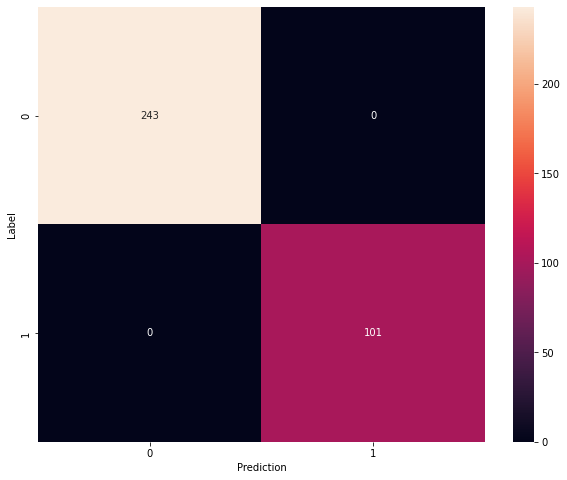

In [ ]:
confusion_mtx  = confusion_matrix(Y_test, rf_prediction) 

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [ ]:
print(classification_report(rf_prediction, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       1.00      1.00      1.00       101

    accuracy                           1.00       344
   macro avg       1.00      1.00      1.00       344
weighted avg       1.00      1.00      1.00       344



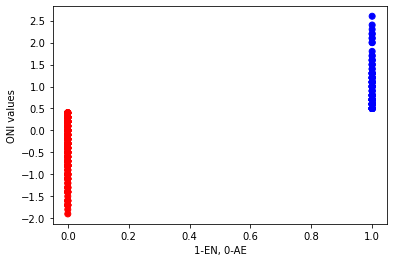

In [ ]:
plot_func(Y_test,X_test,rf_clf)

#### Logistic Regression

In [ ]:
start = time.time()

logreg_clf = LogisticRegression()
logreg_clf.fit(X_train, Y_train)
logreg_prediction = logreg_clf.predict(X_test)
scores = cross_val_score(logreg_clf, X, Y)

end = time.time()

logreg_acc = accuracy_score(logreg_prediction,Y_test)
logreg_mean = scores.mean()
logreg_std = scores.std()

print("Logistic Regression Classifier Accuracy: {0:.2%}".format(logreg_acc))
print("K-Fold Cross Validation score: Mean : {0:.2}, Std : {1:.2}".format(logreg_mean, logreg_std))
print("Execution time: {0:.5} seconds \n".format(end-start))

Logistic Regression Classifier Accuracy: 100.00%
K-Fold Cross Validation score: Mean : 1.0, Std : 0.0
Execution time: 0.028292 seconds 



In [ ]:
acc_all.append(logreg_acc)
mean_all.append(logreg_mean)
std_all.append(logreg_std)
names_all.append('Logistic Regression')

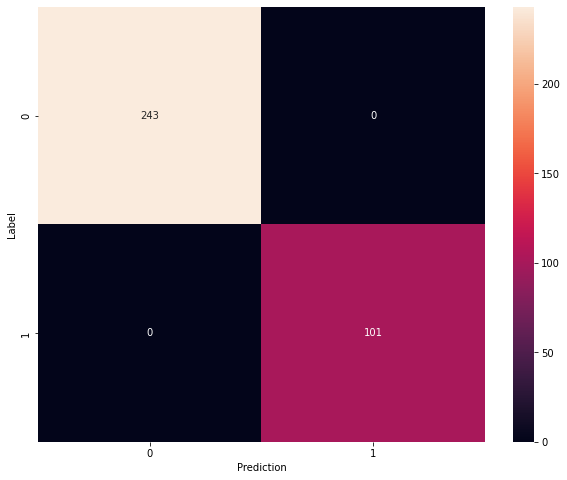

In [ ]:
confusion_mtx  = confusion_matrix(Y_test, logreg_prediction) 

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [ ]:
print(classification_report(logreg_prediction, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       1.00      1.00      1.00       101

    accuracy                           1.00       344
   macro avg       1.00      1.00      1.00       344
weighted avg       1.00      1.00      1.00       344



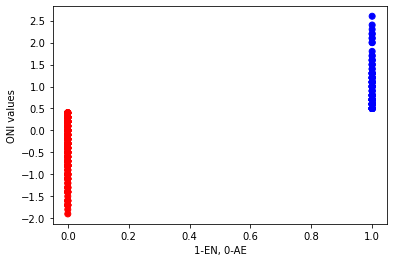

In [ ]:
plot_func(Y_test,X_test,logreg_clf)

#### Naive Bayes (Gaussian)

In [ ]:
start = time.time()

nb_clf = GaussianNB()
nb_clf.fit(X_train, Y_train)
nb_prediction = nb_clf.predict(X_test)
scores = cross_val_score(nb_clf, X, Y)

end = time.time()

nb_acc = accuracy_score(nb_prediction,Y_test)
nb_mean = scores.mean()
nb_std = scores.std()

print("Gaussian Naive Bayes Classifier Accuracy: {0:.2%}".format(nb_acc))
print("K-Fold Cross Validation score: Mean : {0:.2}, Std : {1:.2}".format(nb_mean, nb_std))
print("Execution time: {0:.5} seconds \n".format(end-start))

Gaussian Naive Bayes Classifier Accuracy: 96.22%
K-Fold Cross Validation score: Mean : 0.97, Std : 0.017
Execution time: 0.0083995 seconds 



In [ ]:
acc_all.append(nb_acc)
mean_all.append(nb_mean)
std_all.append(nb_std)
names_all.append('Gaussian NB')

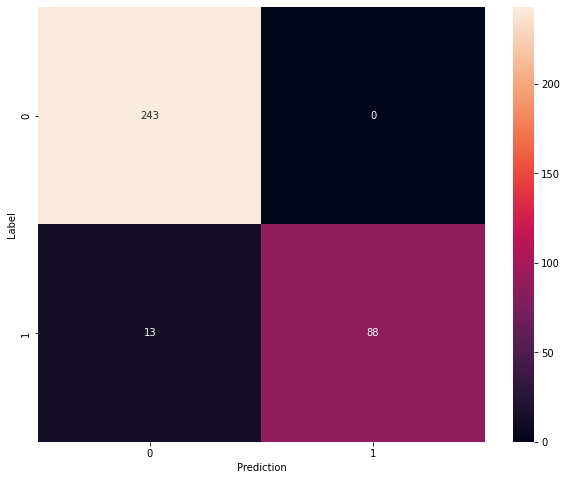

In [ ]:
confusion_mtx  = confusion_matrix(Y_test, nb_prediction) 

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [ ]:
print(classification_report(nb_prediction, Y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       256
           1       0.87      1.00      0.93        88

    accuracy                           0.96       344
   macro avg       0.94      0.97      0.95       344
weighted avg       0.97      0.96      0.96       344



Y_test: 1 Y_pred: 0 X_test: [0.5]
Y_test: 1 Y_pred: 0 X_test: [0.5]
Y_test: 1 Y_pred: 0 X_test: [0.5]
Y_test: 1 Y_pred: 0 X_test: [0.5]
Y_test: 1 Y_pred: 0 X_test: [0.5]
Y_test: 1 Y_pred: 0 X_test: [0.5]
Y_test: 1 Y_pred: 0 X_test: [0.5]
Y_test: 1 Y_pred: 0 X_test: [0.5]
Y_test: 1 Y_pred: 0 X_test: [0.5]
Y_test: 1 Y_pred: 0 X_test: [0.5]
Y_test: 1 Y_pred: 0 X_test: [0.5]
Y_test: 1 Y_pred: 0 X_test: [0.5]
Y_test: 1 Y_pred: 0 X_test: [0.5]


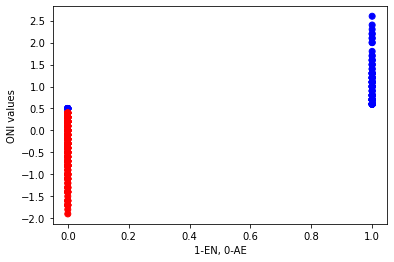

In [ ]:
plot_func(Y_test,X_test,nb_clf)

#### Decision Tree 

In [ ]:
start = time.time()

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, Y_train)
dt_prediction = dt_clf.predict(X_test)
scores = cross_val_score(dt_clf, X, Y)

end = time.time()

dt_acc = accuracy_score(dt_prediction,Y_test)
dt_mean = scores.mean()
dt_std = scores.std()

print("Decision Tree Classifier Accuracy: {0:.2%}".format(dt_acc))
print("K-Fold Cross Validation score: Mean : {0:.2}, Std : {1:.2}".format(dt_mean, dt_std))
print("Execution time: {0:.5} seconds \n".format(end-start))

Decision Tree Classifier Accuracy: 100.00%
K-Fold Cross Validation score: Mean : 1.0, Std : 0.0
Execution time: 0.0097854 seconds 



In [ ]:
acc_all.append(dt_acc)
mean_all.append(dt_mean)
std_all.append(dt_std)
names_all.append('Decision Tree')

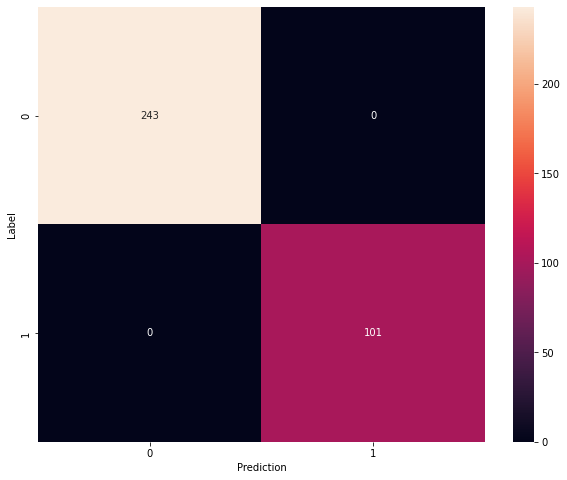

In [ ]:
confusion_mtx  = confusion_matrix(Y_test, dt_prediction) 

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [ ]:
print(classification_report(dt_prediction, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       1.00      1.00      1.00       101

    accuracy                           1.00       344
   macro avg       1.00      1.00      1.00       344
weighted avg       1.00      1.00      1.00       344



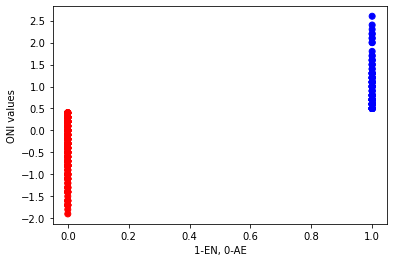

In [ ]:
plot_func(Y_test,X_test,dt_clf)

#### Support Vector Machine

In [ ]:
start = time.time()

svc_clf = SVC()
svc_clf.fit(X_train, Y_train)
svc_prediction = svc_clf.predict(X_test)
scores = cross_val_score(svc_clf, X, Y)

end = time.time()

svc_acc = accuracy_score(svc_prediction,Y_test)
svc_mean = scores.mean()
svc_std = scores.std()

print("Support Vector Machine Classifier Accuracy: {0:.2%}".format(svc_acc))
print("K-Fold Cross Validation score: Mean : {0:.2}, Std : {1:.2}".format(svc_mean, svc_std))
print("Execution time: {0:.5} seconds \n".format(end-start))

Support Vector Machine Classifier Accuracy: 100.00%
K-Fold Cross Validation score: Mean : 1.0, Std : 0.0
Execution time: 0.028532 seconds 



In [ ]:
acc_all.append(svc_acc)
mean_all.append(svc_mean)
std_all.append(svc_std)
names_all.append('Support Vector Machine')

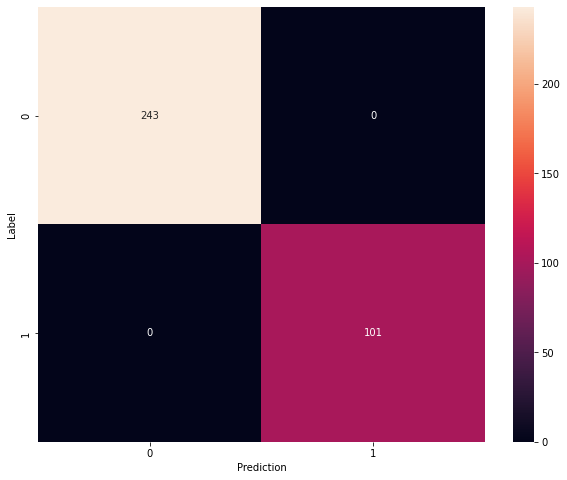

In [ ]:
confusion_mtx  = confusion_matrix(Y_test, svc_prediction) 

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [ ]:
print(classification_report(svc_prediction, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       1.00      1.00      1.00       101

    accuracy                           1.00       344
   macro avg       1.00      1.00      1.00       344
weighted avg       1.00      1.00      1.00       344



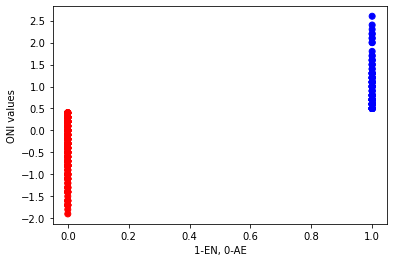

In [ ]:
plot_func(Y_test,X_test,svc_clf)

#### K Nearest Neighbor 

In [ ]:
start = time.time()

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, Y_train)
knn_prediction = knn_clf.predict(X_test)
scores = cross_val_score(knn_clf, X, Y)

end = time.time()

knn_acc = accuracy_score(knn_prediction,Y_test)
knn_mean = scores.mean()
knn_std = scores.std()

print("K Nearest Neighbor Classifier Accuracy: {0:.2%}".format(knn_acc))
print("K-Fold Cross Validation score: Mean : {0:.2}, Std : {1:.2}".format(knn_mean, knn_std))
print("Execution time: {0:.5} seconds \n".format(end-start))

K Nearest Neighbor Classifier Accuracy: 100.00%
K-Fold Cross Validation score: Mean : 1.0, Std : 0.0
Execution time: 0.0518 seconds 



In [ ]:
acc_all.append(knn_acc)
mean_all.append(knn_mean)
std_all.append(knn_std)
names_all.append('K Nearest Neighbor')

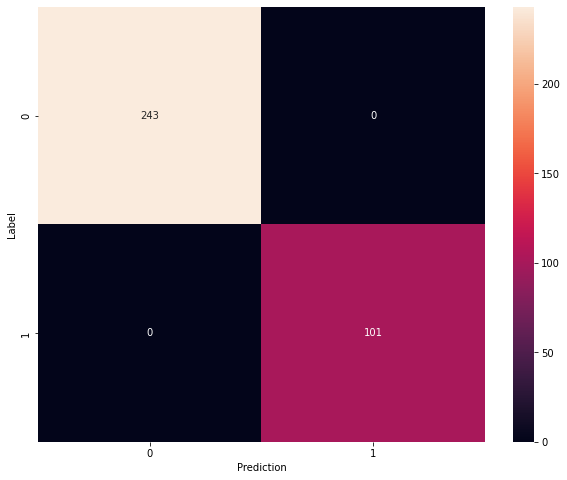

In [ ]:
confusion_mtx  = confusion_matrix(Y_test, knn_prediction) 

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [ ]:
print(classification_report(knn_prediction, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       1.00      1.00      1.00       101

    accuracy                           1.00       344
   macro avg       1.00      1.00      1.00       344
weighted avg       1.00      1.00      1.00       344



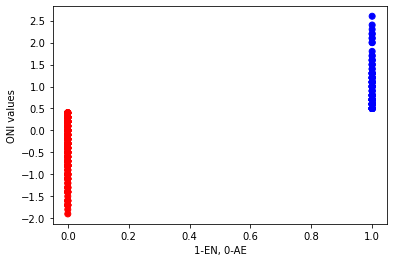

In [ ]:
plot_func(Y_test,X_test,knn_clf)

#### Comparison of the models

In [ ]:
dict = {'accuracy':acc_all, 'mean':mean_all, 'std':std_all}
index = names_all
df = pd.DataFrame(dict, index=index)
df

,accuracy,mean,std
Random Forest,1.000000,1.000000,0.000000
Logistic Regression,1.000000,1.000000,0.000000
Gaussian NB,0.962209,0.972032,0.017098
Decision Tree,1.000000,1.000000,0.000000
Support Vector Machine,1.000000,1.000000,0.000000
K Nearest Neighbor,1.000000,1.000000,0.000000


In [ ]:
acc_df = pd.DataFrame({'Model': names_all,'Accuracy': acc_all})
acc_df = acc_df.sort_values(by='Accuracy', ascending=False)
acc_df = acc_df.set_index('Accuracy')
acc_df

,Model
Accuracy,
1.000000,Random Forest
1.000000,Logistic Regression
1.000000,Decision Tree
1.000000,Support Vector Machine
1.000000,K Nearest Neighbor
0.962209,Gaussian NB


# Classification of EN, LN and RY

## Libraries

In [ ]:
import numpy as np
import pandas as pd
import time

#  for ploting
import matplotlib.pyplot as plt
import seaborn as sns

#importing the required ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Loading data and preprocessing

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
fname = 'oni.csv'

df = pd.read_csv(fname)

df

,1950-present
0,-0.5
1,-0.4
2,-0.4
3,-0.4
4,-0.6
...,...
854,-0.7
855,-0.8
856,-1.0
857,-1.0


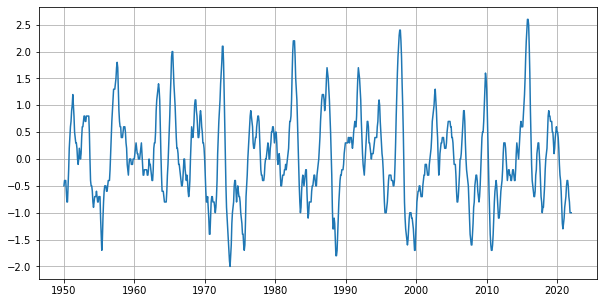

In [ ]:
x = np.linspace(1950,2022,len(df))
plt.figure(figsize=(10,5))
plt.plot(x,df,);
plt.yticks(np.arange(-2, 3, 0.5))
plt.grid();
plt.show();

In [ ]:
# df=df[df.values<2]
X = df.values.reshape(-1,1)
# X

In [ ]:
def target_data_func(X):
  y = []
  for x in X:
    # EN
    if x>=0.5:
      y.append(1)
    # LN
    elif x<=-0.5:
      y.append(2)
    # RY
    else : y.append(0)
  
  Y = np.array(y)
  return Y

In [ ]:
Y = target_data_func(X)
Y

array([2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
unique, counts = np.unique(Y, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  0 369]
 [  1 242]
 [  2 248]]


#### Creating train and test sets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 25)

The variable random_state is used to set the seed for the Random number generation (so the experience is reproducible).

In [ ]:
print('Shape of X_train: ',X_train.shape)
print('Shape of X_test : ',X_test.shape)
print('Shape of Y_train: ',Y_train.shape)
print('Shape of Y_test : ',Y_test.shape)

Shape of X_train:  (515, 1)
Shape of X_test :  (344, 1)
Shape of Y_train:  (515,)
Shape of Y_test :  (344,)


In [ ]:
unique, counts = np.unique(Y_train, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  0 222]
 [  1 141]
 [  2 152]]


In [ ]:
unique, counts = np.unique(Y_test, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  0 147]
 [  1 101]
 [  2  96]]


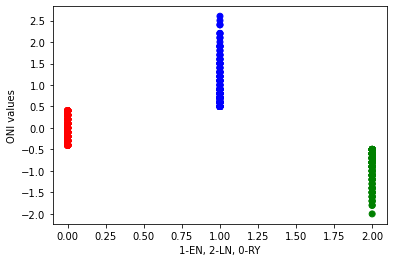

In [ ]:
colors = np.empty(Y_train.shape,dtype=str)
colors[Y_train==0] = 'red' 
colors[Y_train==1] = 'blue'
colors[Y_train==2] = 'green'
plt.figure()
plt.ylabel('ONI values')
plt.xlabel('1-EN, 2-LN, 0-RY')
plt.scatter(Y_train,X_train, c=colors);
plt.yticks(np.arange(-2, 3, 0.5));
plt.show();
plt.close()

## Machine Learning Models




In [ ]:
def plot_func(y,x,clf):
  colors = np.empty(y.shape,dtype=str)
  colors[y==0] = 'red' 
  colors[y==1] = 'blue'
  colors[y==2] = 'green'
  plt.figure()
  plt.ylabel('ONI values')
  plt.xlabel('1-EN, 2-LN, 0-RY')
  pred = clf.predict(x)
  plt.scatter(pred,x, c=colors);
  plt.yticks(np.arange(-2, 3, 0.5));
  for i in range(len(y)):
    if y[i]!=pred[i]:
      print('Y_test:',y[i],'Y_pred:',pred[i],'X_test:',x[i])
  plt.show();
  plt.close()

In [ ]:
acc_all = []
mean_all = []
std_all = []
names_all = []

#### Random Forest Classifier

In [ ]:
start = time.time()

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, Y_train)
rf_prediction = rf_clf.predict(X_test)
scores = cross_val_score(rf_clf, X, Y)

end = time.time()

rf_acc = accuracy_score(rf_prediction,Y_test)
rf_mean = scores.mean()
rf_std = scores.std()

print("Random Forest Classifier Accuracy: {0:.2%}".format(rf_acc))
print("K-Fold Cross Validation score: Mean : {0:.2}, Std : {1:.2}".format(rf_mean, rf_std))
print("Execution time: {0:.5} seconds \n".format(end-start))

Random Forest Classifier Accuracy: 100.00%
K-Fold Cross Validation score: Mean : 1.0, Std : 0.0
Execution time: 1.0265 seconds 



In [ ]:
acc_all.append(rf_acc)
mean_all.append(rf_mean)
std_all.append(rf_std)
names_all.append('Random Forest')

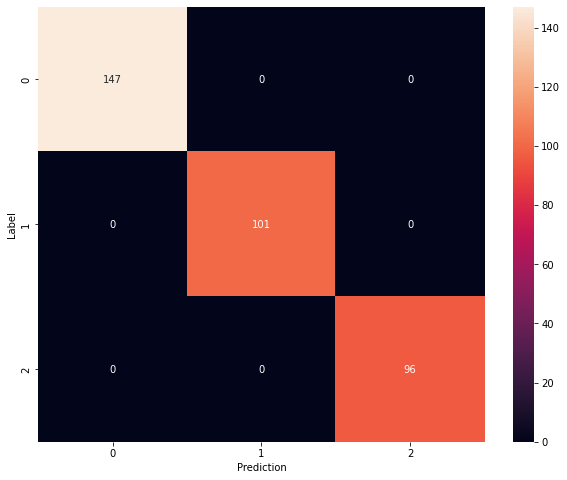

In [ ]:
confusion_mtx  = confusion_matrix(Y_test, rf_prediction) 

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [ ]:
print(classification_report(rf_prediction, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00        96

    accuracy                           1.00       344
   macro avg       1.00      1.00      1.00       344
weighted avg       1.00      1.00      1.00       344



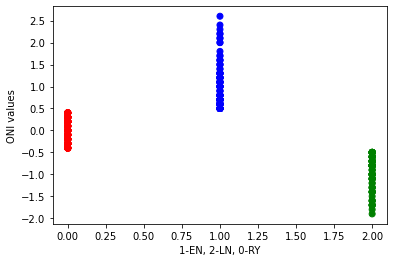

In [ ]:
plot_func(Y_test,X_test,rf_clf)

#### Logistic Regression

In [ ]:
start = time.time()

logreg_clf = LogisticRegression()
logreg_clf.fit(X_train, Y_train)
logreg_prediction = logreg_clf.predict(X_test)
scores = cross_val_score(logreg_clf, X, Y)

end = time.time()

logreg_acc = accuracy_score(logreg_prediction,Y_test)
logreg_mean = scores.mean()
logreg_std = scores.std()

print("Logistic Regression Classifier Accuracy: {0:.2%}".format(logreg_acc))
print("K-Fold Cross Validation score: Mean : {0:.2}, Std : {1:.2}".format(logreg_mean, logreg_std))
print("Execution time: {0:.5} seconds \n".format(end-start))

Logistic Regression Classifier Accuracy: 100.00%
K-Fold Cross Validation score: Mean : 1.0, Std : 0.0
Execution time: 0.0843 seconds 



In [ ]:
acc_all.append(logreg_acc)
mean_all.append(logreg_mean)
std_all.append(logreg_std)
names_all.append('Logistic Regression')

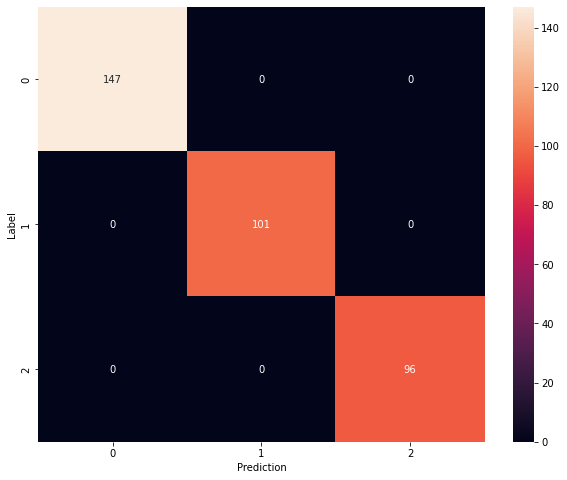

In [ ]:
confusion_mtx  = confusion_matrix(Y_test, logreg_prediction) 

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [ ]:
print(classification_report(logreg_prediction, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00        96

    accuracy                           1.00       344
   macro avg       1.00      1.00      1.00       344
weighted avg       1.00      1.00      1.00       344



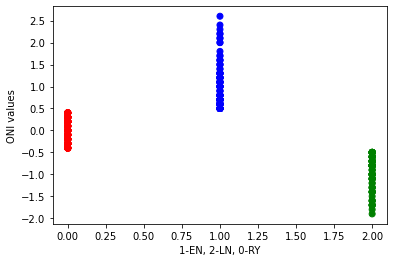

In [ ]:
plot_func(Y_test,X_test,logreg_clf)

#### Naive Bayes (Gaussian)

In [ ]:
start = time.time()

nb_clf = GaussianNB()
nb_clf.fit(X_train, Y_train)
nb_prediction = nb_clf.predict(X_test)
scores = cross_val_score(nb_clf, X, Y)

end = time.time()

nb_acc = accuracy_score(nb_prediction,Y_test)
nb_mean = scores.mean()
nb_std = scores.std()

print("Gaussian Naive Bayes Classifier Accuracy: {0:.2%}".format(nb_acc))
print("K-Fold Cross Validation score: Mean : {0:.2}, Std : {1:.2}".format(nb_mean, nb_std))
print("Execution time: {0:.5} seconds \n".format(end-start))

Gaussian Naive Bayes Classifier Accuracy: 100.00%
K-Fold Cross Validation score: Mean : 1.0, Std : 0.0
Execution time: 0.050371 seconds 



In [ ]:
acc_all.append(nb_acc)
mean_all.append(nb_mean)
std_all.append(nb_std)
names_all.append('Gaussian NB')

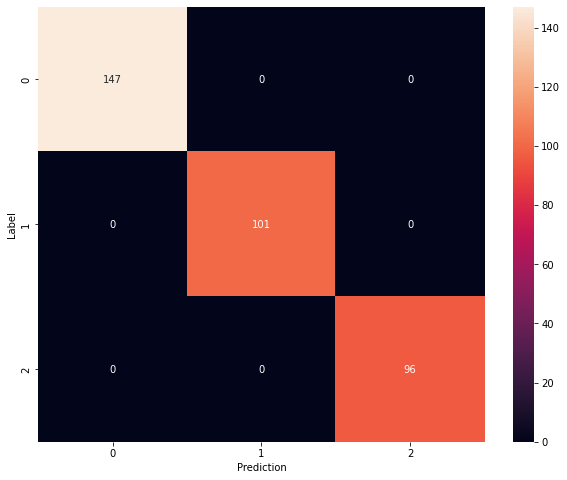

In [ ]:
confusion_mtx  = confusion_matrix(Y_test, nb_prediction) 

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [ ]:
print(classification_report(nb_prediction, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00        96

    accuracy                           1.00       344
   macro avg       1.00      1.00      1.00       344
weighted avg       1.00      1.00      1.00       344



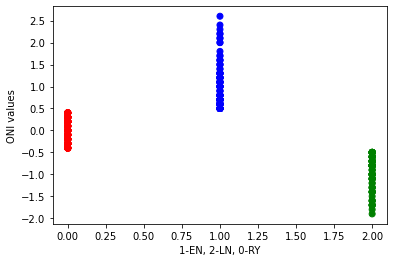

In [ ]:
plot_func(Y_test,X_test,nb_clf)

#### Decision Tree 

In [ ]:
start = time.time()

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, Y_train)
dt_prediction = dt_clf.predict(X_test)
scores = cross_val_score(dt_clf, X, Y)

end = time.time()

dt_acc = accuracy_score(dt_prediction,Y_test)
dt_mean = scores.mean()
dt_std = scores.std()

print("Decision Tree Classifier Accuracy: {0:.2%}".format(dt_acc))
print("K-Fold Cross Validation score: Mean : {0:.2}, Std : {1:.2}".format(dt_mean, dt_std))
print("Execution time: {0:.5} seconds \n".format(end-start))

Decision Tree Classifier Accuracy: 100.00%
K-Fold Cross Validation score: Mean : 1.0, Std : 0.0
Execution time: 0.012761 seconds 



In [ ]:
acc_all.append(dt_acc)
mean_all.append(dt_mean)
std_all.append(dt_std)
names_all.append('Decision Tree')

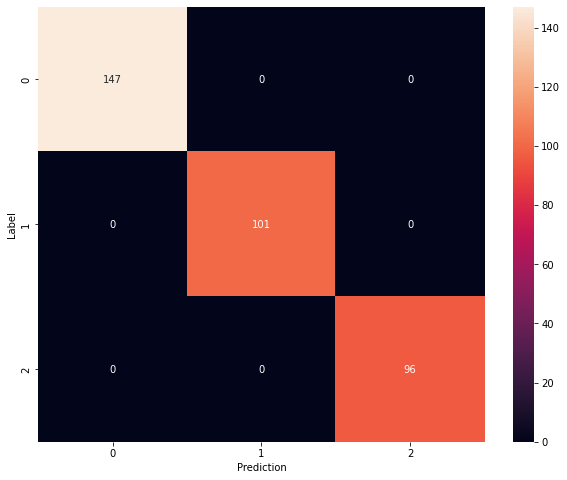

In [ ]:
confusion_mtx  = confusion_matrix(Y_test, dt_prediction) 

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [ ]:
print(classification_report(dt_prediction, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00        96

    accuracy                           1.00       344
   macro avg       1.00      1.00      1.00       344
weighted avg       1.00      1.00      1.00       344



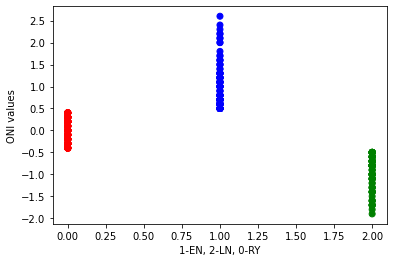

In [ ]:
plot_func(Y_test,X_test,dt_clf)

#### Support Vector Machine

In [ ]:
start = time.time()

svc_clf = SVC()
svc_clf.fit(X_train, Y_train)
svc_prediction = svc_clf.predict(X_test)
scores = cross_val_score(svc_clf, X, Y)

end = time.time()

svc_acc = accuracy_score(svc_prediction,Y_test)
svc_mean = scores.mean()
svc_std = scores.std()

print("Support Vector Machine Classifier Accuracy: {0:.2%}".format(svc_acc))
print("K-Fold Cross Validation score: Mean : {0:.2}, Std : {1:.2}".format(svc_mean, svc_std))
print("Execution time: {0:.5} seconds \n".format(end-start))

Support Vector Machine Classifier Accuracy: 100.00%
K-Fold Cross Validation score: Mean : 1.0, Std : 0.0
Execution time: 0.037345 seconds 



In [ ]:
acc_all.append(svc_acc)
mean_all.append(svc_mean)
std_all.append(svc_std)
names_all.append('Support Vector Machine')

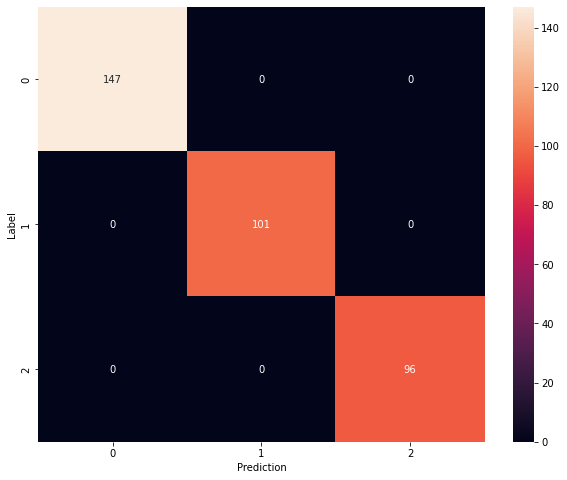

In [ ]:
confusion_mtx  = confusion_matrix(Y_test, svc_prediction) 

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [ ]:
print(classification_report(svc_prediction, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00        96

    accuracy                           1.00       344
   macro avg       1.00      1.00      1.00       344
weighted avg       1.00      1.00      1.00       344



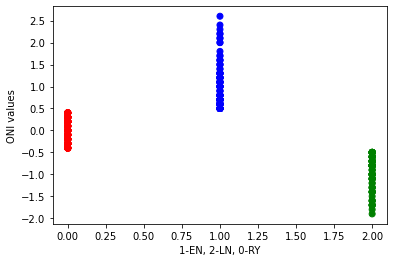

In [ ]:
plot_func(Y_test,X_test,svc_clf)

#### K Nearest Neighbor 

In [ ]:
start = time.time()

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, Y_train)
knn_prediction = knn_clf.predict(X_test)
scores = cross_val_score(knn_clf, X, Y)

end = time.time()

knn_acc = accuracy_score(knn_prediction,Y_test)
knn_mean = scores.mean()
knn_std = scores.std()

print("K Nearest Neighbor Classifier Accuracy: {0:.2%}".format(knn_acc))
print("K-Fold Cross Validation score: Mean : {0:.2}, Std : {1:.2}".format(knn_mean, knn_std))
print("Execution time: {0:.5} seconds \n".format(end-start))

K Nearest Neighbor Classifier Accuracy: 100.00%
K-Fold Cross Validation score: Mean : 1.0, Std : 0.0
Execution time: 0.04434 seconds 



In [ ]:
acc_all.append(knn_acc)
mean_all.append(knn_mean)
std_all.append(knn_std)
names_all.append('K Nearest Neighbor')

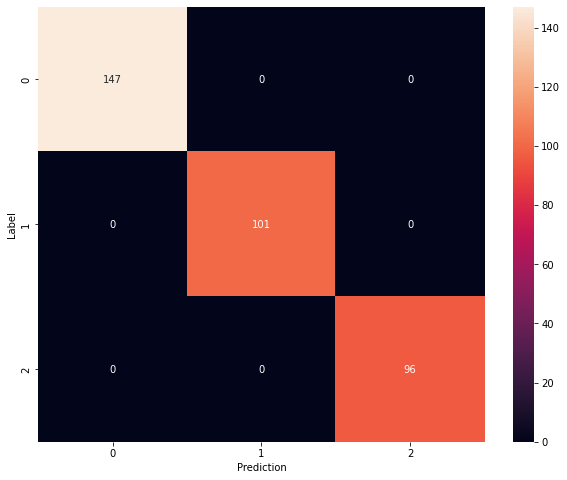

In [ ]:
confusion_mtx  = confusion_matrix(Y_test, knn_prediction) 

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [ ]:
print(classification_report(knn_prediction, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00        96

    accuracy                           1.00       344
   macro avg       1.00      1.00      1.00       344
weighted avg       1.00      1.00      1.00       344



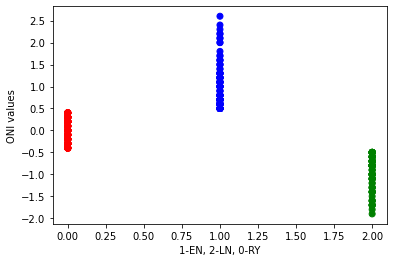

In [ ]:
plot_func(Y_test,X_test,knn_clf)

#### Comparison of the models

In [ ]:
dict = {'accuracy':acc_all, 'mean':mean_all, 'std':std_all}
index = names_all
df = pd.DataFrame(dict, index=index)
df

,accuracy,mean,std
Random Forest,1.0,1.0,0.0
Logistic Regression,1.0,1.0,0.0
Gaussian NB,1.0,1.0,0.0
Decision Tree,1.0,1.0,0.0
Support Vector Machine,1.0,1.0,0.0
K Nearest Neighbor,1.0,1.0,0.0


In [ ]:
acc_df = pd.DataFrame({'Model': names_all,'Accuracy': acc_all})
acc_df = acc_df.sort_values(by='Accuracy', ascending=False)
acc_df = acc_df.set_index('Accuracy')
acc_df

,Model
Accuracy,
1.0,Random Forest
1.0,Logistic Regression
1.0,Gaussian NB
1.0,Decision Tree
1.0,Support Vector Machine
1.0,K Nearest Neighbor


# Classification of SEN, SLN, RY, WEN and WLN

## Libraries

In [ ]:
import numpy as np
import pandas as pd
import time

#  for ploting
import matplotlib.pyplot as plt
import seaborn as sns

#importing the required ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Loading data and preprocessing

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
fname = 'oni.csv'

df = pd.read_csv(fname)

df

,1950-present
0,-0.5
1,-0.4
2,-0.4
3,-0.4
4,-0.6
...,...
854,-0.7
855,-0.8
856,-1.0
857,-1.0


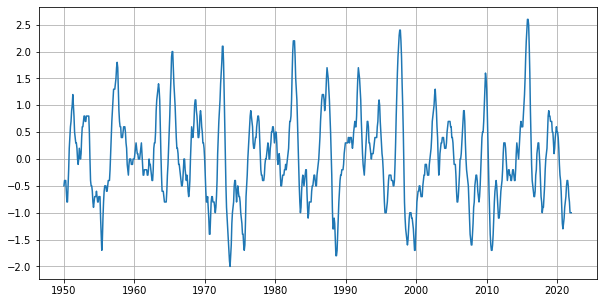

In [ ]:
x = np.linspace(1950,2022,len(df))
plt.figure(figsize=(10,5))
plt.plot(x,df,);
plt.yticks(np.arange(-2, 3, 0.5))
plt.grid();
plt.show();

In [ ]:
# df=df[df.values<2]
X = df.values.reshape(-1,1)
# X

In [ ]:
def target_data_func(X):
  y = []
  for x in X:
    # SLN
    if x<=-1:
      y.append(0)
    # WLN
    elif x<=-0.5 and x>-1:
      y.append(1)
    # WEN
    elif x>=0.5 and x<1:
      y.append(3)    
    # SEN
    elif x>=1:
      y.append(4)    
    # RY
    else : y.append(2)
  
  Y = np.array(y)
  return Y

In [ ]:
Y = target_data_func(X)
Y

array([1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 3, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 4, 4, 4, 4, 4, 4, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 3, 3, 2, 3,
       3, 4, 4, 4, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,

In [ ]:
unique, counts = np.unique(Y, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  0  91]
 [  1 157]
 [  2 369]
 [  3 139]
 [  4 103]]


#### Creating train and test sets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 25)

The variable random_state is used to set the seed for the Random number generation (so the experience is reproducible).

In [ ]:
print('Shape of X_train: ',X_train.shape)
print('Shape of X_test : ',X_test.shape)
print('Shape of Y_train: ',Y_train.shape)
print('Shape of Y_test : ',Y_test.shape)

Shape of X_train:  (515, 1)
Shape of X_test :  (344, 1)
Shape of Y_train:  (515,)
Shape of Y_test :  (344,)


In [ ]:
unique, counts = np.unique(Y_train, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  0  50]
 [  1 102]
 [  2 222]
 [  3  85]
 [  4  56]]


In [ ]:
unique, counts = np.unique(Y_test, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  0  41]
 [  1  55]
 [  2 147]
 [  3  54]
 [  4  47]]


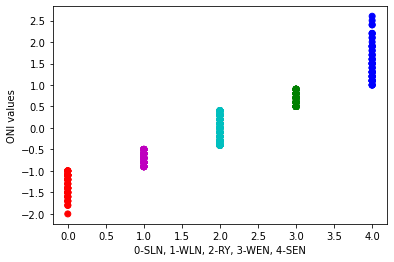

In [ ]:
colors = np.empty(Y_train.shape,dtype=str)
colors[Y_train==0] = 'red' 
colors[Y_train==1] = 'magenta'
colors[Y_train==2] = 'cyan'
colors[Y_train==3] = 'green'
colors[Y_train==4] = 'blue'
plt.figure()
plt.ylabel('ONI values')
plt.xlabel('0-SLN, 1-WLN, 2-RY, 3-WEN, 4-SEN')
plt.scatter(Y_train,X_train, c=colors);
plt.yticks(np.arange(-2, 3, 0.5));
plt.show();
plt.close()

## Machine Learning Models




In [ ]:
def plot_func(y,x,clf):
  colors = np.empty(y.shape,dtype=str)
  colors[y==0] = 'red' 
  colors[y==1] = 'magenta'
  colors[y==2] = 'cyan'
  colors[y==3] = 'green'
  colors[y==4] = 'blue'
  plt.figure()
  plt.ylabel('ONI values')
  plt.xlabel('0-SLN, 1-WLN, 3-RY, 4-WEN, 5-SEN')
  pred = clf.predict(x)
  plt.scatter(pred,x, c=colors);
  plt.yticks(np.arange(-2, 3, 0.5));
  for i in range(len(y)):
    if y[i]!=pred[i]:
      print('Y_test:',y[i],'Y_pred:',pred[i],'X_test:',x[i])
  plt.show();
  plt.close()

In [ ]:
acc_all = []
mean_all = []
std_all = []
names_all = []

#### Random Forest Classifier

In [ ]:
start = time.time()

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, Y_train)
rf_prediction = rf_clf.predict(X_test)
scores = cross_val_score(rf_clf, X, Y)

colors[Y_train==5] = 'yellow'
end = time.time()

rf_acc = accuracy_score(rf_prediction,Y_test)
rf_mean = scores.mean()
rf_std = scores.std()

print("Random Forest Classifier Accuracy: {0:.2%}".format(rf_acc))
print("K-Fold Cross Validation score: Mean : {0:.2}, Std : {1:.2}".format(rf_mean, rf_std))
print("Execution time: {0:.5} seconds \n".format(end-start))

Random Forest Classifier Accuracy: 100.00%
K-Fold Cross Validation score: Mean : 1.0, Std : 0.0
Execution time: 1.0165 seconds 



In [ ]:
acc_all.append(rf_acc)
mean_all.append(rf_mean)
std_all.append(rf_std)
names_all.append('Random Forest')

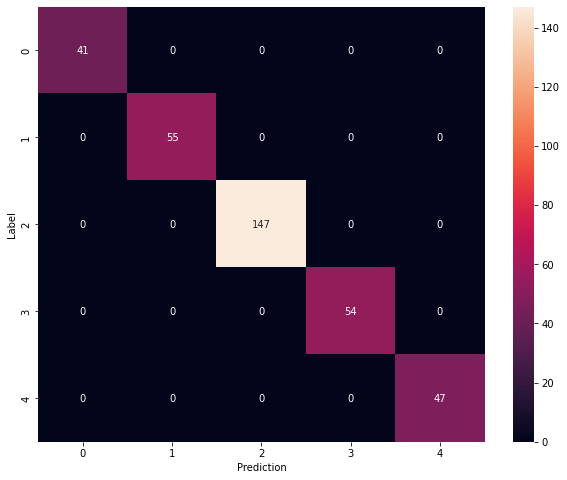

In [ ]:
confusion_mtx  = confusion_matrix(Y_test, rf_prediction) 

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [ ]:
print(classification_report(rf_prediction, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00       147
           3       1.00      1.00      1.00        54
           4       1.00      1.00      1.00        47

    accuracy                           1.00       344
   macro avg       1.00      1.00      1.00       344
weighted avg       1.00      1.00      1.00       344



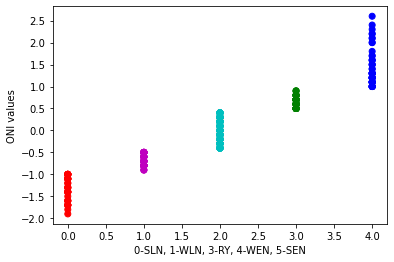

In [ ]:
plot_func(Y_test,X_test,rf_clf)

#### Logistic Regression

In [ ]:
start = time.time()

logreg_clf = LogisticRegression()
logreg_clf.fit(X_train, Y_train)
logreg_prediction = logreg_clf.predict(X_test)
scores = cross_val_score(logreg_clf, X, Y)

end = time.time()

logreg_acc = accuracy_score(logreg_prediction,Y_test)
logreg_mean = scores.mean()
logreg_std = scores.std()

print("Logistic Regression Classifier Accuracy: {0:.2%}".format(logreg_acc))
print("K-Fold Cross Validation score: Mean : {0:.2}, Std : {1:.2}".format(logreg_mean, logreg_std))
print("Execution time: {0:.5} seconds \n".format(end-start))

Logistic Regression Classifier Accuracy: 87.21%
K-Fold Cross Validation score: Mean : 0.88, Std : 0.022
Execution time: 0.10909 seconds 



In [ ]:
acc_all.append(logreg_acc)
mean_all.append(logreg_mean)
std_all.append(logreg_std)
names_all.append('Logistic Regression')

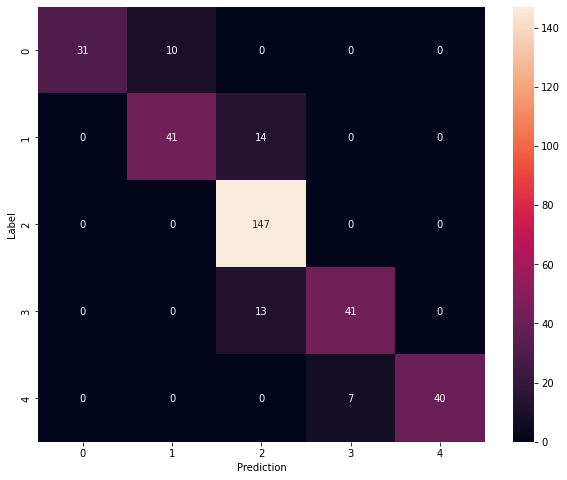

In [ ]:
confusion_mtx  = confusion_matrix(Y_test, logreg_prediction) 

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [ ]:
print(classification_report(logreg_prediction, Y_test))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        31
           1       0.75      0.80      0.77        51
           2       1.00      0.84      0.92       174
           3       0.76      0.85      0.80        48
           4       0.85      1.00      0.92        40

    accuracy                           0.87       344
   macro avg       0.82      0.90      0.85       344
weighted avg       0.89      0.87      0.87       344



Y_test: 3 Y_pred: 2 X_test: [0.5]
Y_test: 1 Y_pred: 2 X_test: [-0.5]
Y_test: 1 Y_pred: 2 X_test: [-0.5]
Y_test: 0 Y_pred: 1 X_test: [-1.]
Y_test: 3 Y_pred: 2 X_test: [0.5]
Y_test: 3 Y_pred: 2 X_test: [0.5]
Y_test: 4 Y_pred: 3 X_test: [1.]
Y_test: 4 Y_pred: 3 X_test: [1.]
Y_test: 1 Y_pred: 2 X_test: [-0.5]
Y_test: 1 Y_pred: 2 X_test: [-0.5]
Y_test: 0 Y_pred: 1 X_test: [-1.]
Y_test: 3 Y_pred: 2 X_test: [0.5]
Y_test: 0 Y_pred: 1 X_test: [-1.]
Y_test: 3 Y_pred: 2 X_test: [0.5]
Y_test: 3 Y_pred: 2 X_test: [0.5]
Y_test: 4 Y_pred: 3 X_test: [1.]
Y_test: 1 Y_pred: 2 X_test: [-0.5]
Y_test: 3 Y_pred: 2 X_test: [0.5]
Y_test: 1 Y_pred: 2 X_test: [-0.5]
Y_test: 0 Y_pred: 1 X_test: [-1.]
Y_test: 4 Y_pred: 3 X_test: [1.]
Y_test: 3 Y_pred: 2 X_test: [0.5]
Y_test: 1 Y_pred: 2 X_test: [-0.5]
Y_test: 1 Y_pred: 2 X_test: [-0.5]
Y_test: 3 Y_pred: 2 X_test: [0.5]
Y_test: 0 Y_pred: 1 X_test: [-1.]
Y_test: 0 Y_pred: 1 X_test: [-1.]
Y_test: 4 Y_pred: 3 X_test: [1.]
Y_test: 1 Y_pred: 2 X_test: [-0.5]
Y_test: 3 

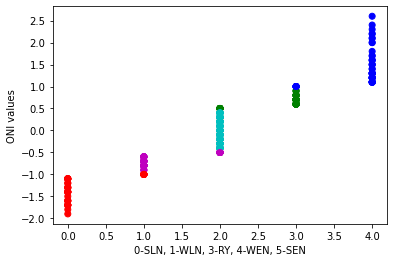

In [ ]:
plot_func(Y_test,X_test,logreg_clf)

#### Naive Bayes (Gaussian)

In [ ]:
start = time.time()

nb_clf = GaussianNB()
nb_clf.fit(X_train, Y_train)
nb_prediction = nb_clf.predict(X_test)
scores = cross_val_score(nb_clf, X, Y)

end = time.time()

nb_acc = accuracy_score(nb_prediction,Y_test)
nb_mean = scores.mean()
nb_std = scores.std()

print("Gaussian Naive Bayes Classifier Accuracy: {0:.2%}".format(nb_acc))
print("K-Fold Cross Validation score: Mean : {0:.2}, Std : {1:.2}".format(nb_mean, nb_std))
print("Execution time: {0:.5} seconds \n".format(end-start))

Gaussian Naive Bayes Classifier Accuracy: 100.00%
K-Fold Cross Validation score: Mean : 1.0, Std : 0.0
Execution time: 0.029991 seconds 



In [ ]:
acc_all.append(nb_acc)
mean_all.append(nb_mean)
std_all.append(nb_std)
names_all.append('Gaussian NB')

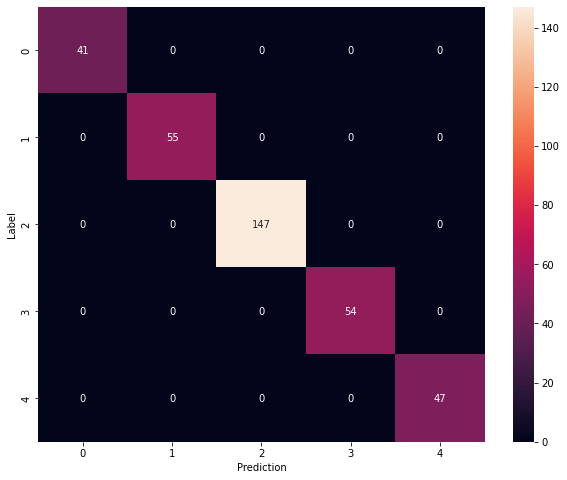

In [ ]:
confusion_mtx  = confusion_matrix(Y_test, nb_prediction) 

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [ ]:
print(classification_report(nb_prediction, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00       147
           3       1.00      1.00      1.00        54
           4       1.00      1.00      1.00        47

    accuracy                           1.00       344
   macro avg       1.00      1.00      1.00       344
weighted avg       1.00      1.00      1.00       344



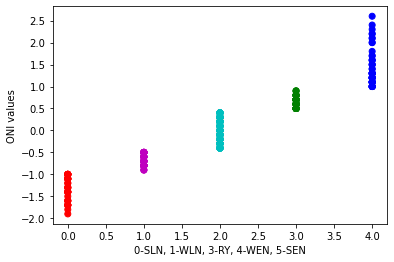

In [ ]:
plot_func(Y_test,X_test,nb_clf)

#### Decision Tree 

In [ ]:
start = time.time()

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, Y_train)
dt_prediction = dt_clf.predict(X_test)
scores = cross_val_score(dt_clf, X, Y)

end = time.time()

dt_acc = accuracy_score(dt_prediction,Y_test)
dt_mean = scores.mean()
dt_std = scores.std()

print("Decision Tree Classifier Accuracy: {0:.2%}".format(dt_acc))
print("K-Fold Cross Validation score: Mean : {0:.2}, Std : {1:.2}".format(dt_mean, dt_std))
print("Execution time: {0:.5} seconds \n".format(end-start))

Decision Tree Classifier Accuracy: 100.00%
K-Fold Cross Validation score: Mean : 1.0, Std : 0.0
Execution time: 0.012576 seconds 



In [ ]:
acc_all.append(dt_acc)
mean_all.append(dt_mean)
std_all.append(dt_std)
names_all.append('Decision Tree')

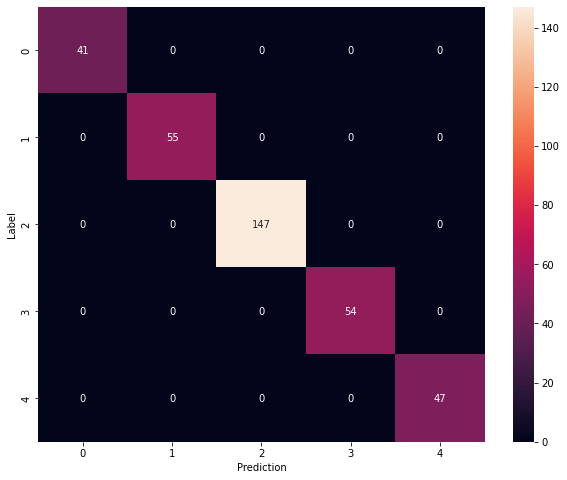

In [ ]:
confusion_mtx  = confusion_matrix(Y_test, dt_prediction) 

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [ ]:
print(classification_report(dt_prediction, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00       147
           3       1.00      1.00      1.00        54
           4       1.00      1.00      1.00        47

    accuracy                           1.00       344
   macro avg       1.00      1.00      1.00       344
weighted avg       1.00      1.00      1.00       344



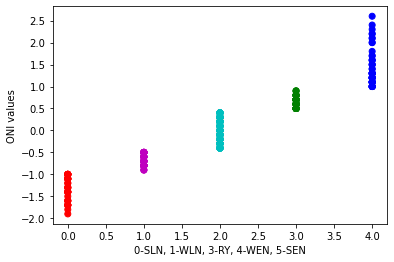

In [ ]:
plot_func(Y_test,X_test,dt_clf)

#### Support Vector Machine

In [ ]:
start = time.time()

svc_clf = SVC()
svc_clf.fit(X_train, Y_train)
svc_prediction = svc_clf.predict(X_test)
scores = cross_val_score(svc_clf, X, Y)

end = time.time()

svc_acc = accuracy_score(svc_prediction,Y_test)
svc_mean = scores.mean()
svc_std = scores.std()

print("Support Vector Machine Classifier Accuracy: {0:.2%}".format(svc_acc))
print("K-Fold Cross Validation score: Mean : {0:.2}, Std : {1:.2}".format(svc_mean, svc_std))
print("Execution time: {0:.5} seconds \n".format(end-start))

Support Vector Machine Classifier Accuracy: 97.97%
K-Fold Cross Validation score: Mean : 1.0, Std : 0.0
Execution time: 0.041775 seconds 



In [ ]:
acc_all.append(svc_acc)
mean_all.append(svc_mean)
std_all.append(svc_std)
names_all.append('Support Vector Machine')

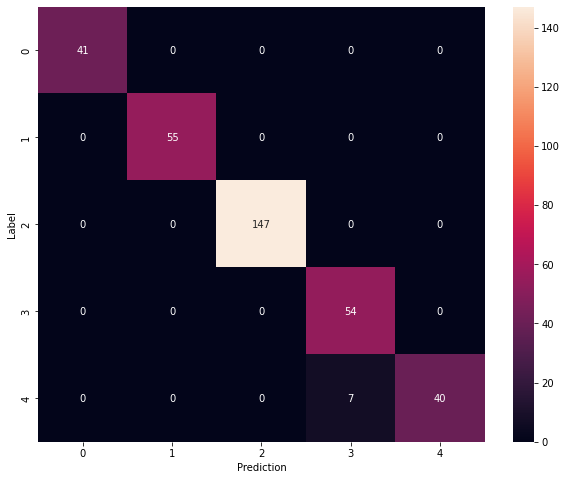

In [ ]:
confusion_mtx  = confusion_matrix(Y_test, svc_prediction) 

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [ ]:
print(classification_report(svc_prediction, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00       147
           3       1.00      0.89      0.94        61
           4       0.85      1.00      0.92        40

    accuracy                           0.98       344
   macro avg       0.97      0.98      0.97       344
weighted avg       0.98      0.98      0.98       344



Y_test: 4 Y_pred: 3 X_test: [1.]
Y_test: 4 Y_pred: 3 X_test: [1.]
Y_test: 4 Y_pred: 3 X_test: [1.]
Y_test: 4 Y_pred: 3 X_test: [1.]
Y_test: 4 Y_pred: 3 X_test: [1.]
Y_test: 4 Y_pred: 3 X_test: [1.]
Y_test: 4 Y_pred: 3 X_test: [1.]


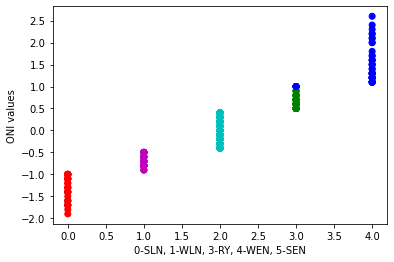

In [ ]:
plot_func(Y_test,X_test,svc_clf)

#### K Nearest Neighbor 

In [ ]:
start = time.time()

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, Y_train)
knn_prediction = knn_clf.predict(X_test)
scores = cross_val_score(knn_clf, X, Y)

end = time.time()

knn_acc = accuracy_score(knn_prediction,Y_test)
knn_mean = scores.mean()
knn_std = scores.std()

print("K Nearest Neighbor Classifier Accuracy: {0:.2%}".format(knn_acc))
print("K-Fold Cross Validation score: Mean : {0:.2}, Std : {1:.2}".format(knn_mean, knn_std))
print("Execution time: {0:.5} seconds \n".format(end-start))

K Nearest Neighbor Classifier Accuracy: 100.00%
K-Fold Cross Validation score: Mean : 1.0, Std : 0.0
Execution time: 0.046857 seconds 



In [ ]:
acc_all.append(knn_acc)
mean_all.append(knn_mean)
std_all.append(knn_std)
names_all.append('K Nearest Neighbor')

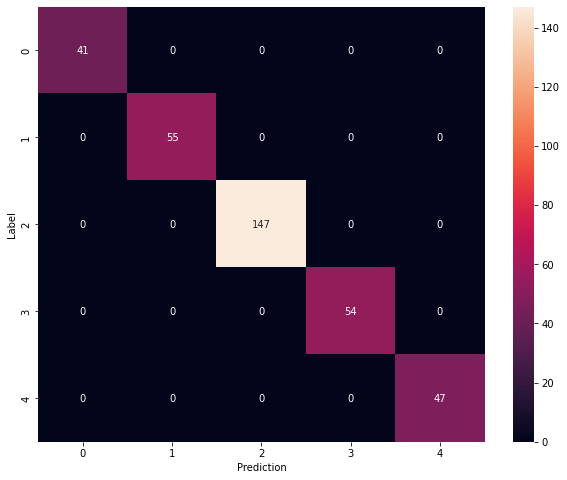

In [ ]:
confusion_mtx  = confusion_matrix(Y_test, knn_prediction) 

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [ ]:
print(classification_report(knn_prediction, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00       147
           3       1.00      1.00      1.00        54
           4       1.00      1.00      1.00        47

    accuracy                           1.00       344
   macro avg       1.00      1.00      1.00       344
weighted avg       1.00      1.00      1.00       344



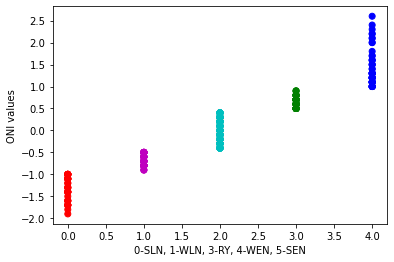

In [ ]:
plot_func(Y_test,X_test,knn_clf)

#### Comparison of the models

In [ ]:
dict = {'accuracy':acc_all, 'mean':mean_all, 'std':std_all}
index = names_all
df = pd.DataFrame(dict, index=index)
df

,accuracy,mean,std
Random Forest,1.000000,1.000000,0.000000
Logistic Regression,0.872093,0.884721,0.022366
Gaussian NB,1.000000,1.000000,0.000000
Decision Tree,1.000000,1.000000,0.000000
Support Vector Machine,0.979651,1.000000,0.000000
K Nearest Neighbor,1.000000,1.000000,0.000000


In [ ]:
acc_df = pd.DataFrame({'Model': names_all,'Accuracy': acc_all})
acc_df = acc_df.sort_values(by='Accuracy', ascending=False)
acc_df = acc_df.set_index('Accuracy')
acc_df

,Model
Accuracy,
1.000000,Random Forest
1.000000,Gaussian NB
1.000000,Decision Tree
1.000000,K Nearest Neighbor
0.979651,Support Vector Machine
0.872093,Logistic Regression


# Classification of WE, ME, SE, VSE and AE

## Libraries

In [ ]:
import numpy as np
import pandas as pd
import time

#  for ploting
import matplotlib.pyplot as plt
import seaborn as sns

#importing the required ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Loading data and preprocessing

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
fname = 'oni.csv'

df = pd.read_csv(fname)

df

,1950-present
0,-0.5
1,-0.4
2,-0.4
3,-0.4
4,-0.6
...,...
854,-0.7
855,-0.8
856,-1.0
857,-1.0


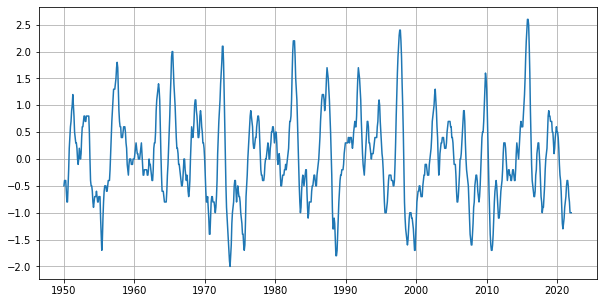

In [ ]:
x = np.linspace(1950,2022,len(df))
plt.figure(figsize=(10,5))
plt.plot(x,df,);
plt.yticks(np.arange(-2, 3, 0.5))
plt.grid();
plt.show();

In [ ]:
# df=df[df.values<2]
X = df.values.reshape(-1,1)
# X

In [ ]:
def target_data_func(X):
  y = []
  for x in X:
    # WE
    if x>=0.5 and x<1:
      y.append(1)
    # ME
    elif x>=1 and x<1.5:
      y.append(2)
    # SE
    elif x>=1.5 and x<2:
      y.append(3)    
    # VSE
    elif x>=2:
      y.append(4)    
    # Otherwise
    else : y.append(0)
  
  Y = np.array(y)
  return Y

In [ ]:
Y = target_data_func(X)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 2, 3, 3, 4, 4, 3, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       2, 2, 3, 3, 4, 4, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
unique, counts = np.unique(Y, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  0 617]
 [  1 139]
 [  2  55]
 [  3  29]
 [  4  19]]


#### Creating train and test sets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 25)

The variable random_state is used to set the seed for the Random number generation (so the experience is reproducible).

In [ ]:
print('Shape of X_train: ',X_train.shape)
print('Shape of X_test : ',X_test.shape)
print('Shape of Y_train: ',Y_train.shape)
print('Shape of Y_test : ',Y_test.shape)

Shape of X_train:  (515, 1)
Shape of X_test :  (344, 1)
Shape of Y_train:  (515,)
Shape of Y_test :  (344,)


In [ ]:
unique, counts = np.unique(Y_train, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  0 374]
 [  1  85]
 [  2  26]
 [  3  20]
 [  4  10]]


In [ ]:
unique, counts = np.unique(Y_test, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  0 243]
 [  1  54]
 [  2  29]
 [  3   9]
 [  4   9]]


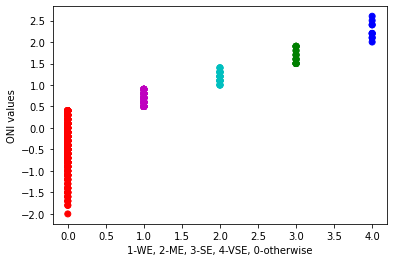

In [ ]:
colors = np.empty(Y_train.shape,dtype=str)
colors[Y_train==0] = 'red' 
colors[Y_train==1] = 'magenta'
colors[Y_train==2] = 'cyan'
colors[Y_train==3] = 'green'
colors[Y_train==4] = 'blue'
plt.figure()
plt.ylabel('ONI values')
plt.xlabel('1-WE, 2-ME, 3-SE, 4-VSE, 0-otherwise')
plt.scatter(Y_train,X_train, c=colors);
plt.yticks(np.arange(-2, 3, 0.5));
plt.show();
plt.close()

## Machine Learning Models




In [ ]:
def plot_func(y,x,clf):
  colors = np.empty(y.shape,dtype=str)
  colors[y==0] = 'red' 
  colors[y==1] = 'magenta'
  colors[y==2] = 'cyan'
  colors[y==3] = 'green'
  colors[y==4] = 'blue'
  plt.figure()
  plt.ylabel('ONI values')
  plt.xlabel('1-WE, 2-ME, 3-SE, 4-VSE, 0-otherwise')
  pred = clf.predict(x)
  plt.scatter(pred,x, c=colors);
  plt.yticks(np.arange(-2, 3, 0.5));
  for i in range(len(y)):
    if y[i]!=pred[i]:
      print('Y_test:',y[i],'Y_pred:',pred[i],'X_test:',x[i])
  plt.show();
  plt.close()

In [ ]:
acc_all = []
mean_all = []
std_all = []
names_all = []

#### Random Forest Classifier

In [ ]:
start = time.time()

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, Y_train)
rf_prediction = rf_clf.predict(X_test)
scores = cross_val_score(rf_clf, X, Y)

end = time.time()

rf_acc = accuracy_score(rf_prediction,Y_test)
rf_mean = scores.mean()
rf_std = scores.std()

print("Random Forest Classifier Accuracy: {0:.2%}".format(rf_acc))
print("K-Fold Cross Validation score: Mean : {0:.2}, Std : {1:.2}".format(rf_mean, rf_std))
print("Execution time: {0:.5} seconds \n".format(end-start))

Random Forest Classifier Accuracy: 100.00%
K-Fold Cross Validation score: Mean : 1.0, Std : 0.0
Execution time: 1.6713 seconds 



In [ ]:
acc_all.append(rf_acc)
mean_all.append(rf_mean)
std_all.append(rf_std)
names_all.append('Random Forest')

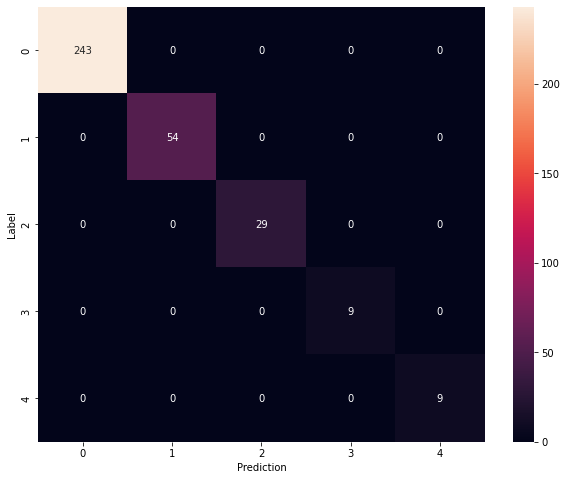

In [ ]:
confusion_mtx  = confusion_matrix(Y_test, rf_prediction) 

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [ ]:
print(classification_report(rf_prediction, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         9

    accuracy                           1.00       344
   macro avg       1.00      1.00      1.00       344
weighted avg       1.00      1.00      1.00       344



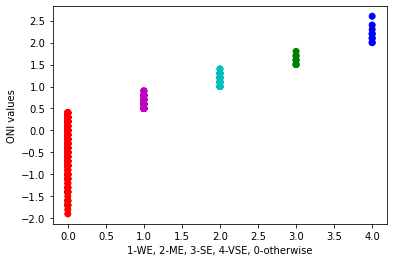

In [ ]:
plot_func(Y_test,X_test,rf_clf)

#### Logistic Regression

In [ ]:
start = time.time()

logreg_clf = LogisticRegression()
logreg_clf.fit(X_train, Y_train)
logreg_prediction = logreg_clf.predict(X_test)
scores = cross_val_score(logreg_clf, X, Y)

end = time.time()

logreg_acc = accuracy_score(logreg_prediction,Y_test)
logreg_mean = scores.mean()
logreg_std = scores.std()

print("Logistic Regression Classifier Accuracy: {0:.2%}".format(logreg_acc))
print("K-Fold Cross Validation score: Mean : {0:.2}, Std : {1:.2}".format(logreg_mean, logreg_std))
print("Execution time: {0:.5} seconds \n".format(end-start))

Logistic Regression Classifier Accuracy: 85.76%
K-Fold Cross Validation score: Mean : 0.92, Std : 0.021
Execution time: 0.1993 seconds 



In [ ]:
acc_all.append(logreg_acc)
mean_all.append(logreg_mean)
std_all.append(logreg_std)
names_all.append('Logistic Regression')

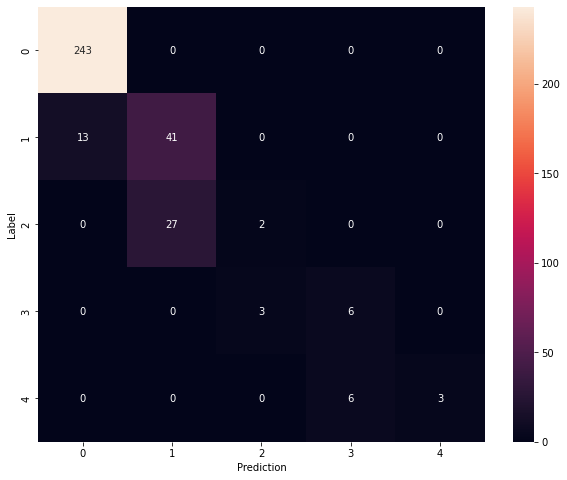

In [ ]:
confusion_mtx  = confusion_matrix(Y_test, logreg_prediction) 

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [ ]:
print(classification_report(logreg_prediction, Y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       256
           1       0.76      0.60      0.67        68
           2       0.07      0.40      0.12         5
           3       0.67      0.50      0.57        12
           4       0.33      1.00      0.50         3

    accuracy                           0.86       344
   macro avg       0.57      0.69      0.57       344
weighted avg       0.92      0.86      0.88       344



Y_test: 4 Y_pred: 3 X_test: [2.1]
Y_test: 1 Y_pred: 0 X_test: [0.5]
Y_test: 3 Y_pred: 2 X_test: [1.5]
Y_test: 3 Y_pred: 2 X_test: [1.5]
Y_test: 1 Y_pred: 0 X_test: [0.5]
Y_test: 1 Y_pred: 0 X_test: [0.5]
Y_test: 2 Y_pred: 1 X_test: [1.]
Y_test: 2 Y_pred: 1 X_test: [1.]
Y_test: 2 Y_pred: 1 X_test: [1.2]
Y_test: 4 Y_pred: 3 X_test: [2.2]
Y_test: 4 Y_pred: 3 X_test: [2.2]
Y_test: 2 Y_pred: 1 X_test: [1.3]
Y_test: 3 Y_pred: 2 X_test: [1.5]
Y_test: 2 Y_pred: 1 X_test: [1.2]
Y_test: 2 Y_pred: 1 X_test: [1.3]
Y_test: 1 Y_pred: 0 X_test: [0.5]
Y_test: 2 Y_pred: 1 X_test: [1.1]
Y_test: 2 Y_pred: 1 X_test: [1.3]
Y_test: 2 Y_pred: 1 X_test: [1.1]
Y_test: 2 Y_pred: 1 X_test: [1.3]
Y_test: 1 Y_pred: 0 X_test: [0.5]
Y_test: 4 Y_pred: 3 X_test: [2.]
Y_test: 1 Y_pred: 0 X_test: [0.5]
Y_test: 2 Y_pred: 1 X_test: [1.]
Y_test: 2 Y_pred: 1 X_test: [1.1]
Y_test: 2 Y_pred: 1 X_test: [1.2]
Y_test: 1 Y_pred: 0 X_test: [0.5]
Y_test: 4 Y_pred: 3 X_test: [2.1]
Y_test: 2 Y_pred: 1 X_test: [1.]
Y_test: 1 Y_pred: 0

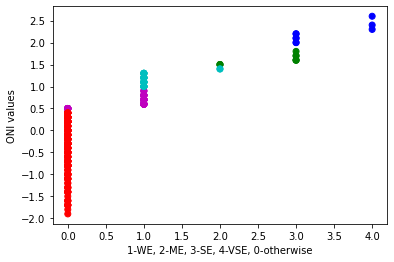

In [ ]:
plot_func(Y_test,X_test,logreg_clf)

#### Naive Bayes (Gaussian)

In [ ]:
start = time.time()

nb_clf = GaussianNB()
nb_clf.fit(X_train, Y_train)
nb_prediction = nb_clf.predict(X_test)
scores = cross_val_score(nb_clf, X, Y)

end = time.time()

nb_acc = accuracy_score(nb_prediction,Y_test)
nb_mean = scores.mean()
nb_std = scores.std()

print("Gaussian Naive Bayes Classifier Accuracy: {0:.2%}".format(nb_acc))
print("K-Fold Cross Validation score: Mean : {0:.2}, Std : {1:.2}".format(nb_mean, nb_std))
print("Execution time: {0:.5} seconds \n".format(end-start))

Gaussian Naive Bayes Classifier Accuracy: 100.00%
K-Fold Cross Validation score: Mean : 1.0, Std : 0.0
Execution time: 0.020408 seconds 



In [ ]:
acc_all.append(nb_acc)
mean_all.append(nb_mean)
std_all.append(nb_std)
names_all.append('Gaussian NB')

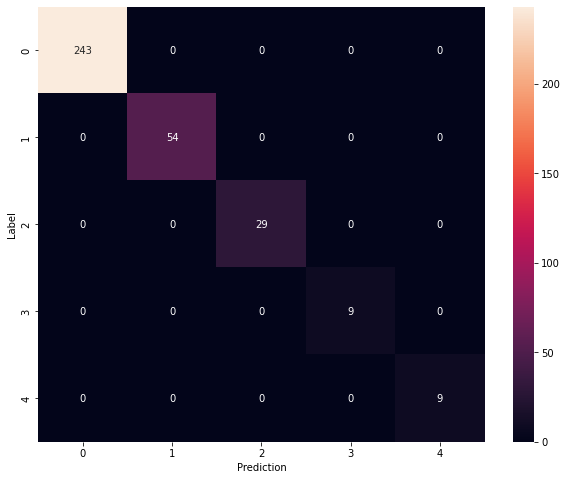

In [ ]:
confusion_mtx  = confusion_matrix(Y_test, nb_prediction) 

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [ ]:
print(classification_report(nb_prediction, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         9

    accuracy                           1.00       344
   macro avg       1.00      1.00      1.00       344
weighted avg       1.00      1.00      1.00       344



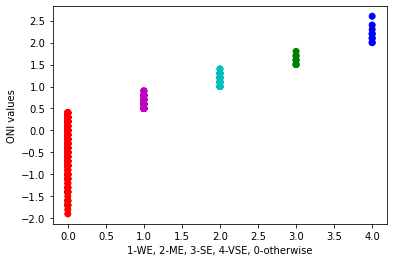

In [ ]:
plot_func(Y_test,X_test,nb_clf)

#### Decision Tree 

In [ ]:
start = time.time()

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, Y_train)
dt_prediction = dt_clf.predict(X_test)
scores = cross_val_score(dt_clf, X, Y)

end = time.time()

dt_acc = accuracy_score(dt_prediction,Y_test)
dt_mean = scores.mean()
dt_std = scores.std()

print("Decision Tree Classifier Accuracy: {0:.2%}".format(dt_acc))
print("K-Fold Cross Validation score: Mean : {0:.2}, Std : {1:.2}".format(dt_mean, dt_std))
print("Execution time: {0:.5} seconds \n".format(end-start))

Decision Tree Classifier Accuracy: 100.00%
K-Fold Cross Validation score: Mean : 1.0, Std : 0.0
Execution time: 0.014118 seconds 



In [ ]:
acc_all.append(dt_acc)
mean_all.append(dt_mean)
std_all.append(dt_std)
names_all.append('Decision Tree')

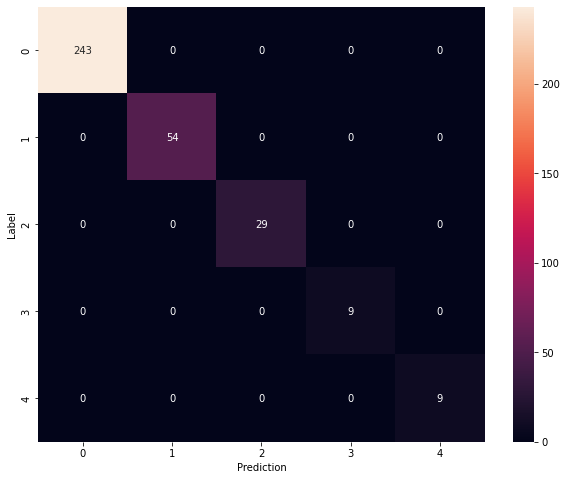

In [ ]:
confusion_mtx  = confusion_matrix(Y_test, dt_prediction) 

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [ ]:
print(classification_report(dt_prediction, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         9

    accuracy                           1.00       344
   macro avg       1.00      1.00      1.00       344
weighted avg       1.00      1.00      1.00       344



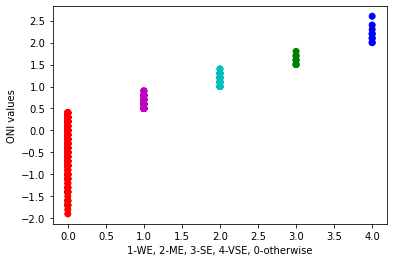

In [ ]:
plot_func(Y_test,X_test,dt_clf)

#### Support Vector Machine

In [ ]:
start = time.time()

svc_clf = SVC()
svc_clf.fit(X_train, Y_train)
svc_prediction = svc_clf.predict(X_test)
scores = cross_val_score(svc_clf, X, Y)

end = time.time()

svc_acc = accuracy_score(svc_prediction,Y_test)
svc_mean = scores.mean()
svc_std = scores.std()

print("Support Vector Machine Classifier Accuracy: {0:.2%}".format(svc_acc))
print("K-Fold Cross Validation score: Mean : {0:.2}, Std : {1:.2}".format(svc_mean, svc_std))
print("Execution time: {0:.5} seconds \n".format(end-start))

Support Vector Machine Classifier Accuracy: 97.38%
K-Fold Cross Validation score: Mean : 1.0, Std : 0.0
Execution time: 0.073649 seconds 



In [ ]:
acc_all.append(svc_acc)
mean_all.append(svc_mean)
std_all.append(svc_std)
names_all.append('Support Vector Machine')

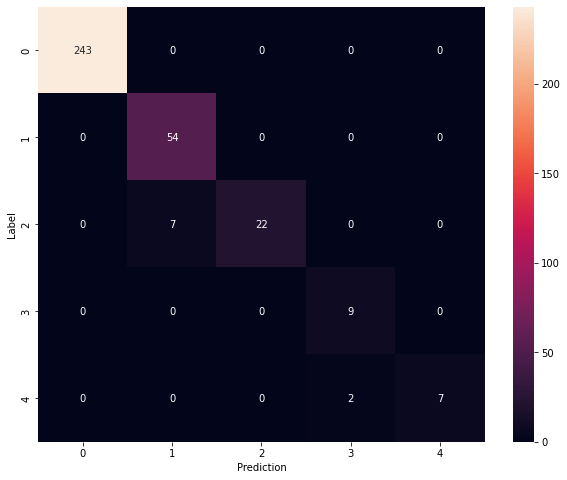

In [ ]:
confusion_mtx  = confusion_matrix(Y_test, svc_prediction) 

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [ ]:
print(classification_report(svc_prediction, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       1.00      0.89      0.94        61
           2       0.76      1.00      0.86        22
           3       1.00      0.82      0.90        11
           4       0.78      1.00      0.88         7

    accuracy                           0.97       344
   macro avg       0.91      0.94      0.92       344
weighted avg       0.98      0.97      0.97       344



Y_test: 2 Y_pred: 1 X_test: [1.]
Y_test: 2 Y_pred: 1 X_test: [1.]
Y_test: 4 Y_pred: 3 X_test: [2.]
Y_test: 2 Y_pred: 1 X_test: [1.]
Y_test: 2 Y_pred: 1 X_test: [1.]
Y_test: 2 Y_pred: 1 X_test: [1.]
Y_test: 4 Y_pred: 3 X_test: [2.]
Y_test: 2 Y_pred: 1 X_test: [1.]
Y_test: 2 Y_pred: 1 X_test: [1.]


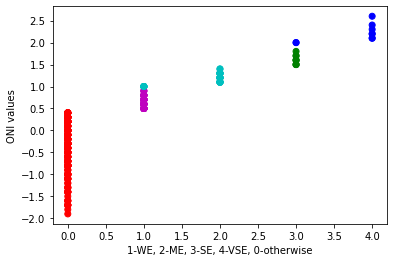

In [ ]:
plot_func(Y_test,X_test,svc_clf)

#### K Nearest Neighbor 

In [ ]:
start = time.time()

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, Y_train)
knn_prediction = knn_clf.predict(X_test)
scores = cross_val_score(knn_clf, X, Y)

end = time.time()

knn_acc = accuracy_score(knn_prediction,Y_test)
knn_mean = scores.mean()
knn_std = scores.std()

print("K Nearest Neighbor Classifier Accuracy: {0:.2%}".format(knn_acc))
print("K-Fold Cross Validation score: Mean : {0:.2}, Std : {1:.2}".format(knn_mean, knn_std))
print("Execution time: {0:.5} seconds \n".format(end-start))

K Nearest Neighbor Classifier Accuracy: 99.42%
K-Fold Cross Validation score: Mean : 1.0, Std : 0.0047
Execution time: 0.067992 seconds 



In [ ]:
acc_all.append(knn_acc)
mean_all.append(knn_mean)
std_all.append(knn_std)
names_all.append('K Nearest Neighbor')

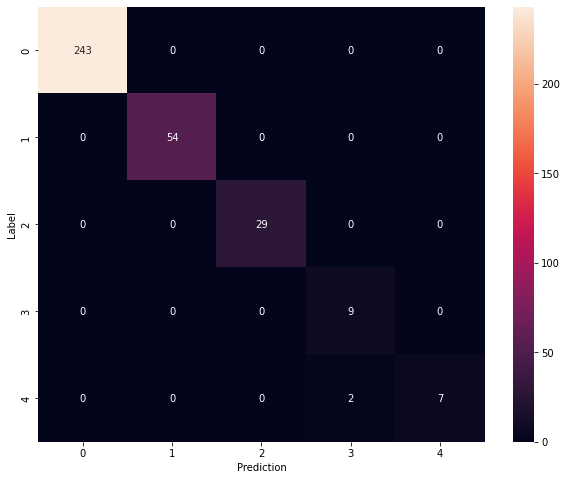

In [ ]:
confusion_mtx  = confusion_matrix(Y_test, knn_prediction) 

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [ ]:
print(classification_report(knn_prediction, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00        29
           3       1.00      0.82      0.90        11
           4       0.78      1.00      0.88         7

    accuracy                           0.99       344
   macro avg       0.96      0.96      0.96       344
weighted avg       1.00      0.99      0.99       344



Y_test: 4 Y_pred: 3 X_test: [2.]
Y_test: 4 Y_pred: 3 X_test: [2.]


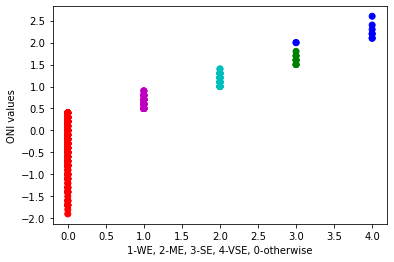

In [ ]:
plot_func(Y_test,X_test,knn_clf)

#### Comparison of the models

In [ ]:
dict = {'accuracy':acc_all, 'mean':mean_all, 'std':std_all}
index = names_all
df = pd.DataFrame(dict, index=index)
df

,accuracy,mean,std
Random Forest,1.000000,1.000000,0.000000
Logistic Regression,0.857558,0.921977,0.021429
Gaussian NB,1.000000,1.000000,0.000000
Decision Tree,1.000000,1.000000,0.000000
Support Vector Machine,0.973837,1.000000,0.000000
K Nearest Neighbor,0.994186,0.997674,0.004651


In [ ]:
acc_df = pd.DataFrame({'Model': names_all,'Accuracy': acc_all})
acc_df = acc_df.sort_values(by='Accuracy', ascending=False)
acc_df = acc_df.set_index('Accuracy')
acc_df

,Model
Accuracy,
1.000000,Random Forest
1.000000,Gaussian NB
1.000000,Decision Tree
0.994186,K Nearest Neighbor
0.973837,Support Vector Machine
0.857558,Logistic Regression
